# Présentation
Ce pipeline *Jupyter* va réaliser une exploration de données sur un jeu de données autour du bonheur dans le monde.

## Auteurs du notebook jupyter

Maud et Odd ; étudiants de Master 2 à l’université Lyon1.

Dépôt gitHub du projet : [https://github.com/FoxOdd/ECD-HappyWorld](https://github.com/FoxOdd/ECD-HappyWorld)

## Données

Les données ont été téléchangées depuis plusieurs sources sur le net, pour plus d’information, nous invitons le lecteur à consulter notre documentation. Ces données ont été assemblé en utilisant un précédent script Python.
Elles sont disponible dans le répertoire : `export` et elles sont contenues dans plusieurs fichiers en fonction de leur année.
La liste des fichiers est la suivantes :
- `data2015.csv`
- `data2016.csv`
- `data2017.csv`
- `data2018.csv`

## Dépendances

Afin de fonctionner au mieux, ce pipeline a besoin des packages python suivant :
- `pandas` : [https://pandas.pydata.org/](https://pandas.pydata.org/)
- `sklearn` : [https://scikit-learn.org/](https://scikit-learn.org/)

In [1]:
import numpy as np
np.set_printoptions(threshold=10000, suppress=True)
import pandas
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mplt
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  # normalisation des données

# Importation des données
## Réduction de dimension et visualisation des données

In [2]:
data = pandas.read_csv('export/data2015.csv', sep='\t')
print(data.shape)
data.head()

(157, 27)


,ISO,Happy_rank,Happy_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Perceptions_of_corruption,Generosity,RSF_rank,...,Urban_population.json,Coefficient_human_inequality.json,Mean_years_of_schooling.json,Unemployment.json,Mean_years_of_schooling_male.json,Homicide_rate.json,Education_index.json,Forest_area.json,Mortality_rate_infant.json,Unnamed: 26
0,CHE,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,20,...,73.7,8.409,13.085,4.801,13.890,0.687,0.885,31.734,3.807,NaN
1,ISL,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,21,...,93.7,5.697,12.191,3.979,12.560,0.908,0.906,0.491,1.701,NaN
2,DNK,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,3,...,87.5,7.048,12.531,6.168,12.381,1.090,0.918,14.580,3.581,NaN
3,NOR,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2,...,81.1,5.366,12.525,4.296,12.498,0.462,0.911,33.172,2.200,NaN
4,CAN,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,8,...,81.3,8.679,13.239,6.906,13.018,1.693,0.880,38.167,4.606,NaN


Il est important pour la suite de la fouille des données de supprimer les colonnes représentant des rangs. Par exemple, `Happy_rank` et `RSF_rank`.

In [3]:
###### INTERACTION ######
columnsToDrop = [1,9]  # renseigner ici les colonnes à ne pas considérer pour la suite de l’analyse
#########################
newData = data.drop(data.columns[columnsToDrop], axis=1)
newData.head()

,ISO,Happy_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Perceptions_of_corruption,Generosity,RSF_score,Mean_years_of_schooling_female.json,...,Urban_population.json,Coefficient_human_inequality.json,Mean_years_of_schooling.json,Unemployment.json,Mean_years_of_schooling_male.json,Homicide_rate.json,Education_index.json,Forest_area.json,Mortality_rate_infant.json,Unnamed: 26
0,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,13.85,12.980,...,73.7,8.409,13.085,4.801,13.890,0.687,0.885,31.734,3.807,NaN
1,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,13.87,12.152,...,93.7,5.697,12.191,3.979,12.560,0.908,0.906,0.491,1.701,NaN
2,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,8.24,12.658,...,87.5,7.048,12.531,6.168,12.381,1.090,0.918,14.580,3.581,NaN
3,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.75,12.552,...,81.1,5.366,12.525,4.296,12.498,0.462,0.911,33.172,2.200,NaN
4,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,10.99,13.459,...,81.3,8.679,13.239,6.906,13.018,1.693,0.880,38.167,4.606,NaN


In [4]:
# Assignation des variables
X = newData.iloc[:, 2:].values  # la première colonne contient le code iso du pays et la deuxième est le score du bonheur qui est notre variable à expliqué (le bonheur)
Y = newData.iloc[:, 0].values  # vaeur iso, utilse pour le label des points

# Traitement des valeurs inconnues : NA
X[X == 'NA'] = np.nan
X = X.astype(float)  # conversion des valeurs numériques

# Application d’une stratégie pour transformer les NA en valeurs
# ici, les valeurs manquantes prendront une valeur moyenne
SimImp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_si = SimImp.fit_transform(X)

## Réalisation d’une ACP

Nous allons ici réaliser une première analyse statistique : une ACP pour déterminer les variables ayant un fort poids explicatif de notre variable à expliquer.<br>
De ce fait, les données seront normalisées.

In [5]:
SC = StandardScaler()
SC.fit(X_si)  # calcul de la moyenne et l’écart-type des variables
Xnorm = SC.transform(X_si)  # nouvelle matrice normalisée des variables

pca = PCA(n_components = .9)  # Ici nous ne voulons garder que 90% d,explication de notre variable à expliquer (le bonheur)
pca.fit(Xnorm)
X_pca = pca.transform(Xnorm)

print(pca.explained_variance_ratio_)

[0.50190739 0.09938545 0.06923343 0.0590716  0.04734164 0.04234639
 0.03575952 0.0275597  0.02219586]


In [6]:
def makePltShow(dataX, dataY, labelsY, clustering=None, axes=False):
    """
    Make a plot with data.
    """
    colors = ['green','purple', 'red', 'blue']
    fig, ax = plt.subplots(num=None, figsize=(20, 8), dpi=96, facecolor='w', edgecolor='k')
    if axes:
        plt.axhline(0, color='purple', alpha=0.3)
        plt.axvline(0, color='purple', alpha=0.3)
    plt.scatter(dataX, dataY, c=clustering, cmap=mplt.colors.ListedColormap(colors))
    for label, x, y in zip(labelsY, dataX, dataY):
        plt.annotate(label, xy=(x,y), xytext=(1, 0.2), textcoords='offset points', fontsize=8)
    plt.show()

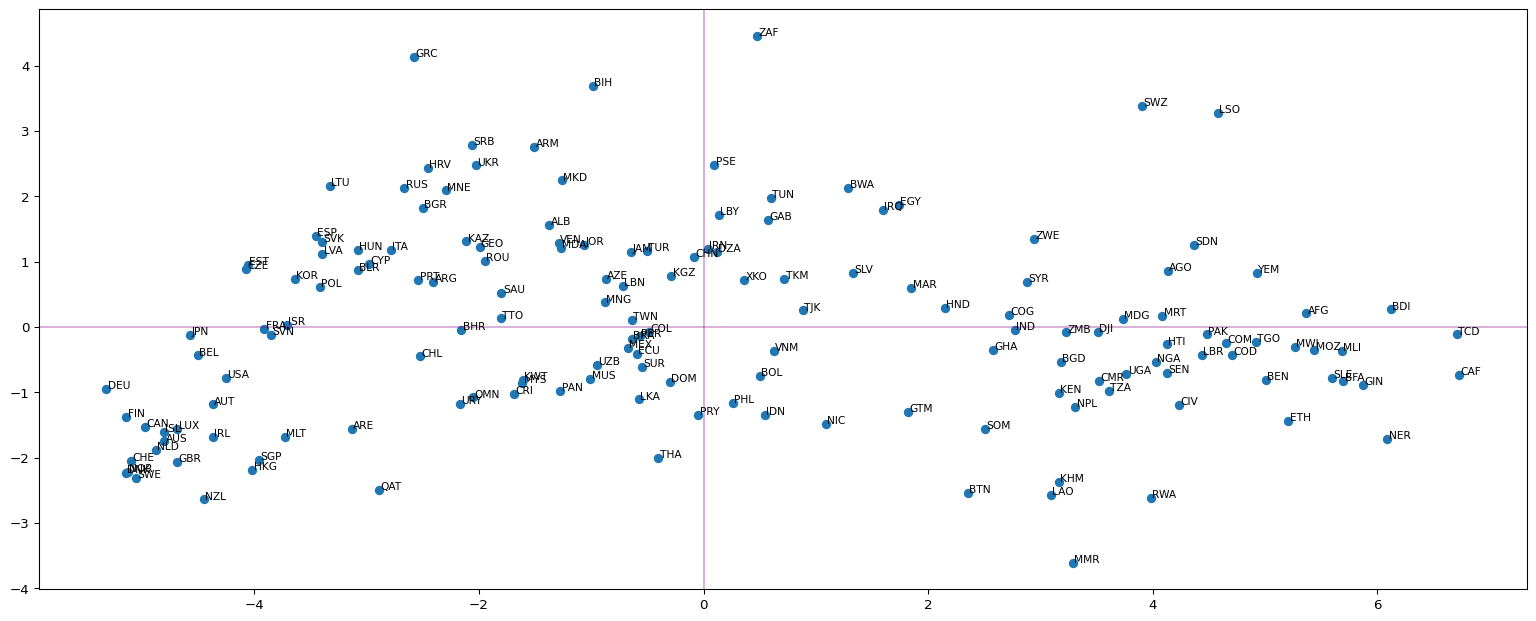

In [7]:
# plot
makePltShow(X_pca[:,0], X_pca[:, 1], Y, clustering=None, axes=True)

**Interprétation des axes possible !**<br>

> *pour 2015 :*

L’axe vertical (de bas en haut) : niveau de chomage générosité de faible à élevé.<br>
l’axe horizontale (de gauche à droite) : niveau de liberté, élevé à bas.

## Clustering

Dans cette étape nous allons réaliser un clustering sur les variables ayant un fort poids d’influence sur notre variable a expliquer.

Afin de déterminer le bon nombre de cluster à prendre en compte pour les différentes méthodes de clustering employées, nous allons calculer le *silouhette index*.

In [8]:
### Silouhette index
numberRangeClustering = np.arange(2,7)  # ici on va tester de 2 à 7 clustering

print("K-Means :")
for i in numberRangeClustering:
    clustering = KMeans(n_clusters=i).fit_predict(Xnorm)
    print(f"nombre de clusters : {i} ; SI = {metrics.silhouette_score(X_si, clustering, metric='euclidean'):.4}")
    
print("Ward :")
for i in numberRangeClustering:
    clustering = AgglomerativeClustering(n_clusters=i, linkage='ward').fit_predict(Xnorm)
    print(f"nombre de clusters : {i} ; SI = {metrics.silhouette_score(X_si, clustering, metric='euclidean'):.4}")
print("Average :")
for i in numberRangeClustering:
    clustering = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(Xnorm)
    print(f"nombre de clusters : {i} ; SI = {metrics.silhouette_score(X_si, clustering, metric='euclidean'):.4}")

K-Means :
nombre de clusters : 2 ; SI = 0.363
nombre de clusters : 3 ; SI = 0.2202
nombre de clusters : 4 ; SI = 0.1635
nombre de clusters : 5 ; SI = 0.1262
nombre de clusters : 6 ; SI = 0.1388
Ward :
nombre de clusters : 2 ; SI = 0.3633
nombre de clusters : 3 ; SI = 0.2386
nombre de clusters : 4 ; SI = 0.2093
nombre de clusters : 5 ; SI = 0.1283
nombre de clusters : 6 ; SI = 0.1529
Average :
nombre de clusters : 2 ; SI = 0.3922
nombre de clusters : 3 ; SI = 0.08634
nombre de clusters : 4 ; SI = 0.2764
nombre de clusters : 5 ; SI = 0.238
nombre de clusters : 6 ; SI = 0.2245


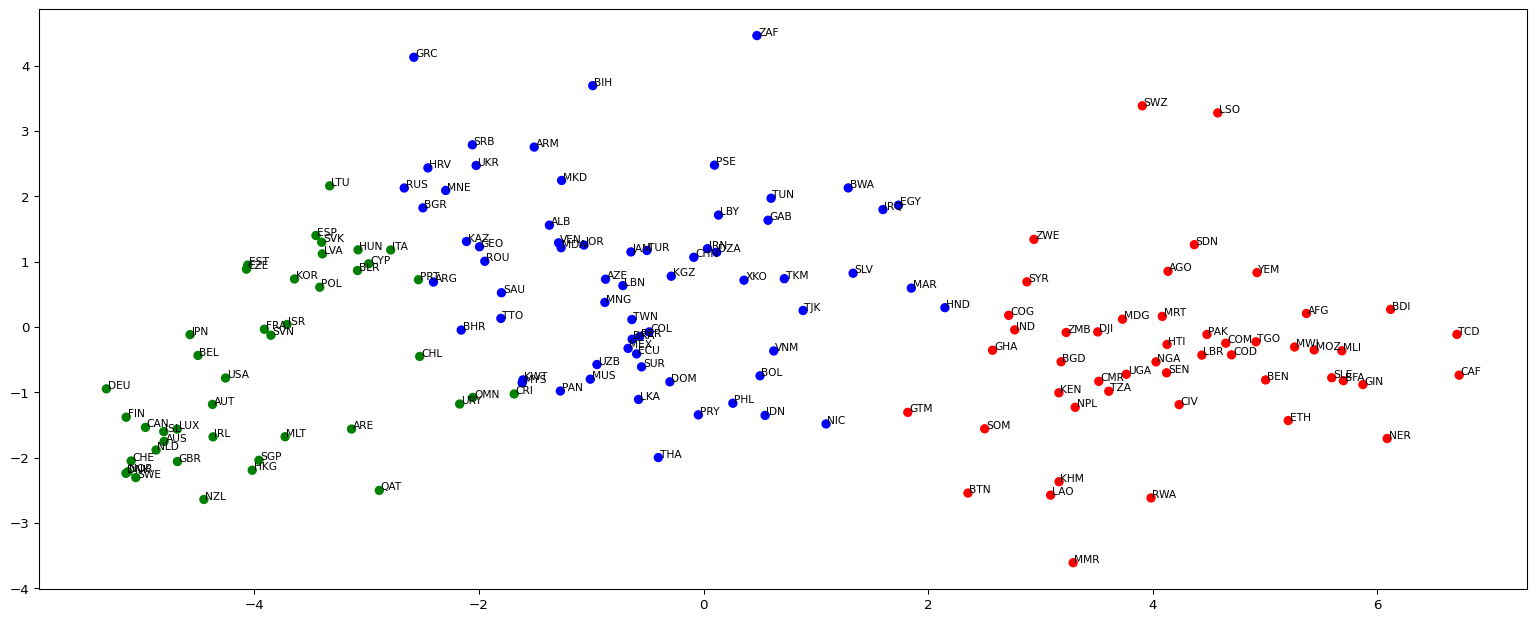

In [9]:
# clustering avec la méthode des KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(Xnorm)
clustering = kmeans.labels_

makePltShow(X_pca[:,0], X_pca[:, 1], Y, clustering=clustering, axes=False)

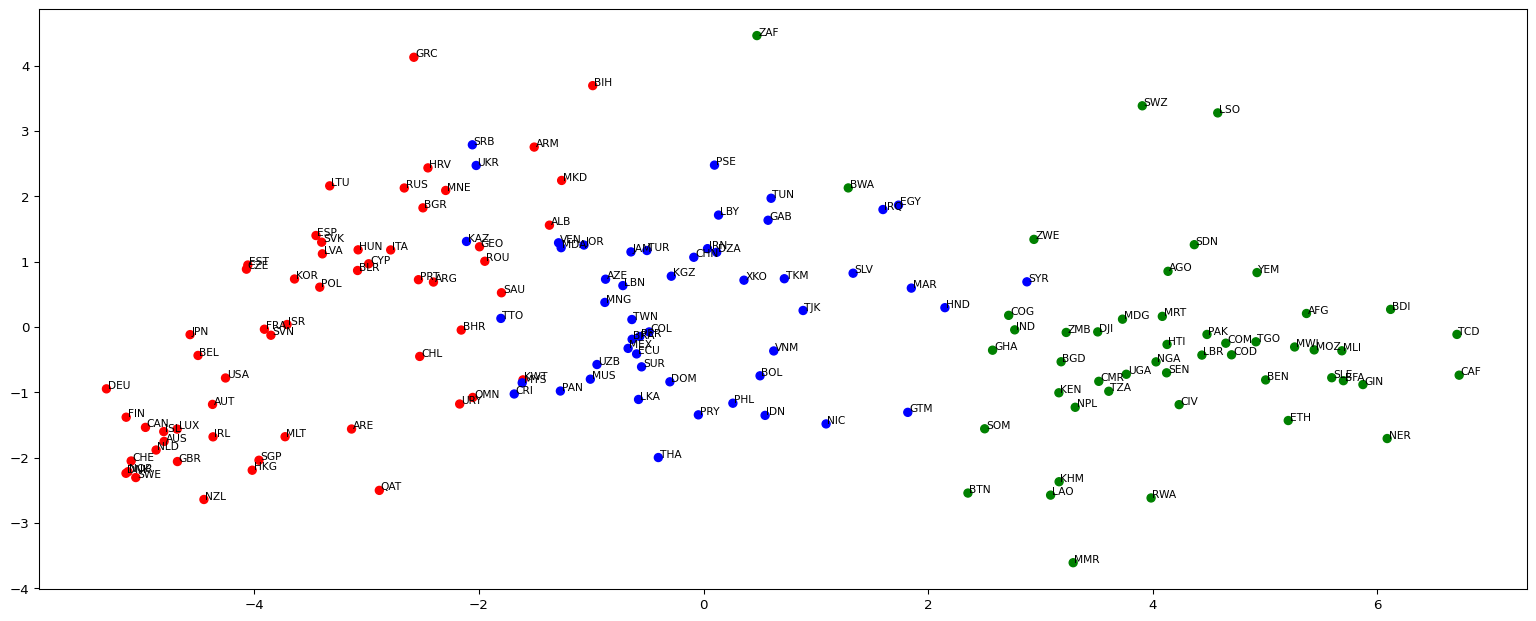

In [10]:
# Clustering hiérarchique avec la méthode ward
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(Xnorm)
clustering = agglo.labels_

makePltShow(X_pca[:,0], X_pca[:, 1], Y, clustering=clustering, axes=False)

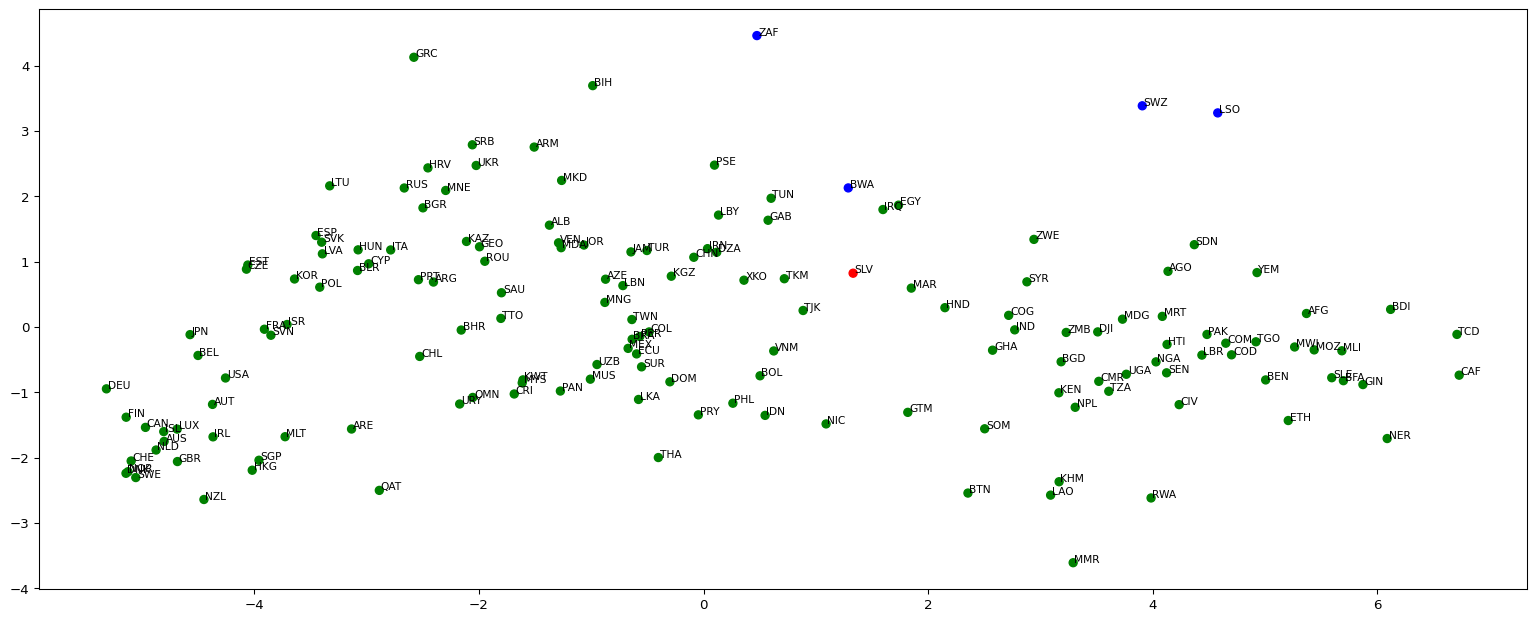

In [11]:
# Clustering hiérarchique avec la méthode average
agglo = AgglomerativeClustering(n_clusters=3, linkage='average').fit(Xnorm)
clustering = agglo.labels_

makePltShow(X_pca[:,0], X_pca[:, 1], Y, clustering=clustering, axes=False)

Fin de l’analyse !